In [514]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

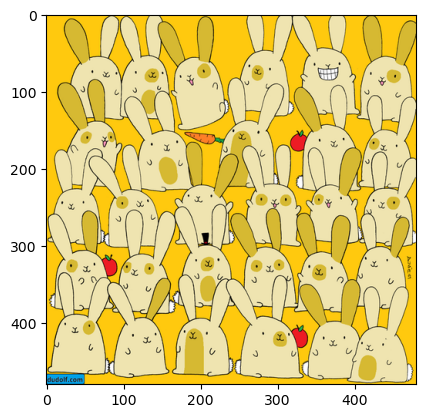

In [515]:
# Load the image
rabbit = cv2.imread('rabbit2.png')
# Show the image
plt.imshow(rabbit[:,:,::-1])

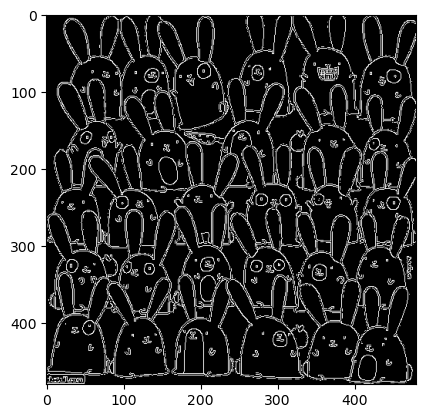

In [516]:
# Edge detection by Canny
edges = cv2.Canny(rabbit, 100, 200)
# Show the edge image
plt.imshow(edges, cmap='gray')

In [517]:
# Create a list of templates
templates = []

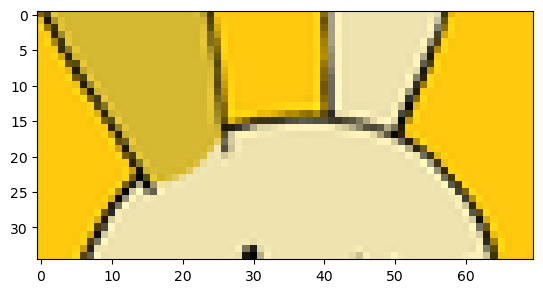

In [518]:
# Get template 1
template1 = rabbit[40:75, 30: 100]
# Apply Canny edge detection
edges1 = cv2.Canny(template1, 100,200)
# Show the template
plt.imshow(template1[:,:,::-1])
# Append to the list
templates.append(edges1)

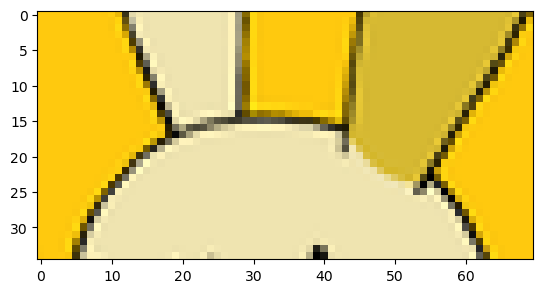

In [519]:
# Get template 4 by flipping template 1
template4 = cv2.flip(template1, 1)
# Apply Canny edge detection
edges4 = cv2.Canny(template4, 100,200)
# Show the template
plt.imshow(template4[:,:,::-1])
# Append to the list
templates.append(edges4)

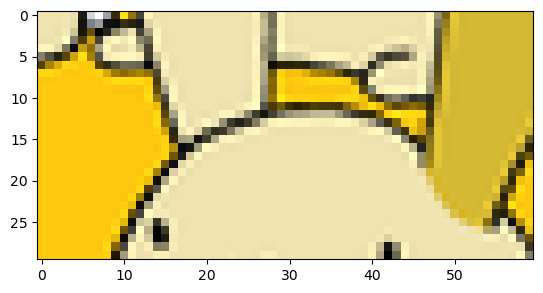

In [520]:
# Get template 2
template2 = rabbit[290:320, 400: 460]
# Apply Canny edge detection
edges2 = cv2.Canny(template2, 100,200)
# Show the template
plt.imshow(template2[:,:,::-1])
# Append to the list
templates.append(edges2)

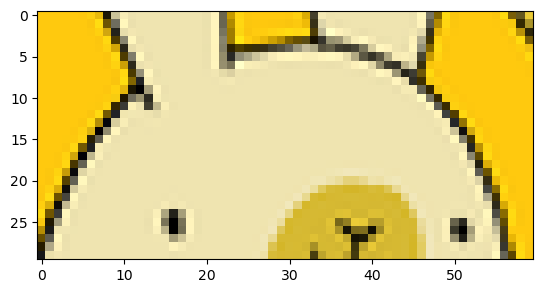

In [521]:
# Get template 3
template3 = rabbit[50: 80, 100: 160]
# Apply Canny edge detection
edges3 = cv2.Canny(template3, 100,200)
# Show the template
plt.imshow(template3[:,:,::-1])
# Append to the list
templates.append(edges3)

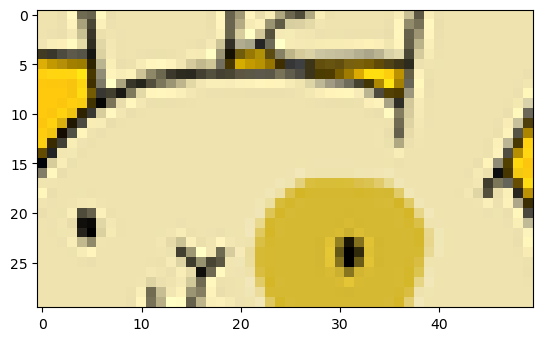

In [522]:
# Get template 5
template5 = rabbit[220: 250, 420: 470]
# Apply Canny edge detection
edges5 = cv2.Canny(template5, 100,200)
# Show the template
plt.imshow(template5[:,:,::-1])
# Append to the list
templates.append(edges5)

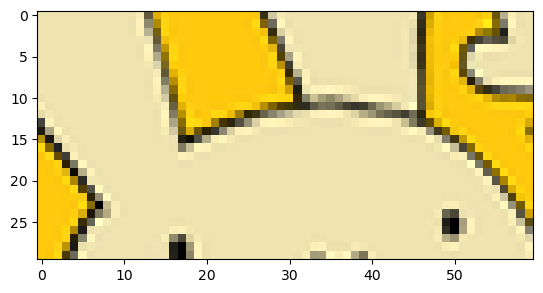

In [523]:
# Get template 6
template6 = rabbit[140:170, 120: 180]
# Apply Canny edge detection
edges6 = cv2.Canny(template6, 100,200)
# Show the template
plt.imshow(template6[:,:,::-1])
# Append to the list
templates.append(edges6)

In [524]:
# Non-Maximum Suppression (NMS)
def non_max_suppression(boxes, overlapThresh):
    if len(boxes) == 0:
        return []
    if boxes.dtype.kind == "i":
        boxes = boxes.astype("float")
    pick = []
    x1 = boxes[:, 0]
    y1 = boxes[:, 1]
    x2 = boxes[:, 2]
    y2 = boxes[:, 3]
    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    idxs = np.argsort(y2)
    while len(idxs) > 0:
        last = len(idxs) - 1
        i = idxs[last]
        pick.append(i)
        xx1 = np.maximum(x1[i], x1[idxs[:last]])
        yy1 = np.maximum(y1[i], y1[idxs[:last]])
        xx2 = np.minimum(x2[i], x2[idxs[:last]])
        yy2 = np.minimum(y2[i], y2[idxs[:last]])
        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)
        overlap = (w * h) / area[idxs[:last]]
        idxs = np.delete(idxs, np.concatenate(([last], np.where(overlap > overlapThresh)[0])))
    return boxes[pick].astype("int")

# Count the number of pair_boot with NMS
def count_rabbit(image, templates, edges):

    # Apply template matching and collect bounding boxes
    boxes = []
    threshold = 0.22

    for template in templates:
        res = cv2.matchTemplate(edges, template, cv2.TM_CCOEFF_NORMED)
        loc = np.where(res >= threshold)
        
        for pt in zip(*loc[::-1]):
            box = [pt[0], pt[1], pt[0] + template.shape[1], pt[1] + template.shape[0]]
            boxes.append(box)

    # Convert boxes to numpy array
    boxes = np.array(boxes)

    # Apply non-max suppression
    if len(boxes) > 0:
        boxes = non_max_suppression(boxes, overlapThresh=0.05)

    # Draw rectangles for remaining boxes
    for (x1, y1, x2, y2) in boxes:
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

    # Show the image with bounding boxes
    plt.imshow(image[:,:,::-1])
    plt.title(f'Number of objects found: {len(boxes)}')
    plt.axis('off')
    plt.show()

    return len(boxes)

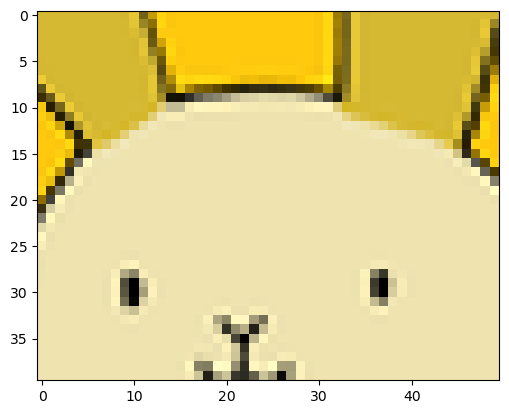

In [525]:
# Get template 7
template7 = rabbit[390:430, 350: 400]
# Apply Canny edge detection
edges7 = cv2.Canny(template7, 100,200)
# Show the template
plt.imshow(template7[:,:,::-1])
# Append to the list
templates.append(edges7)

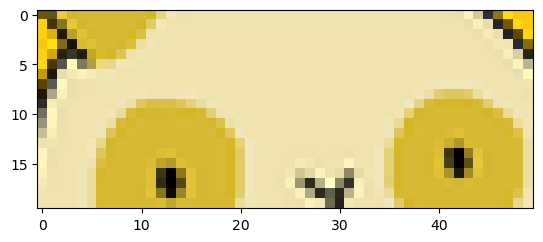

In [526]:
# Get template 8
template8 = rabbit[310:330, 260: 310]
# Apply Canny edge detection
edges8 = cv2.Canny(template8, 100,200)
# Show the template
plt.imshow(template8[:,:,::-1])
# Append to the list
templates.append(edges8)


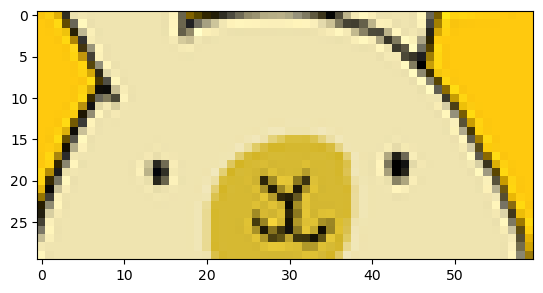

In [527]:
# Get template 9
template9 = rabbit[300:330, 180: 240]
# Apply Canny edge detection
edges9 = cv2.Canny(template9, 100,200)
# Show the template
plt.imshow(template9[:,:,::-1])
# Append to the list
templates.append(edges9)


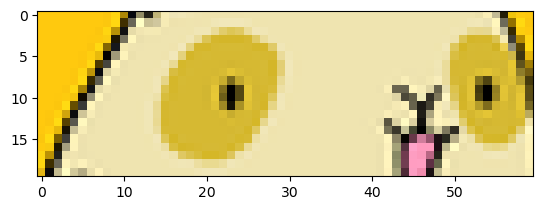

In [528]:
# Get template 10
template10 = rabbit[150:170, 30: 90]
# Apply Canny edge detection
edges10 = cv2.Canny(template10, 100,200)
# Show the template
plt.imshow(template10[:,:,::-1])
# Append to the list
templates.append(edges10)


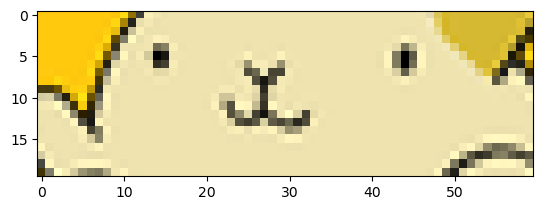

In [529]:
# Get template 11
template11 = rabbit[230:250, 170: 230]
# Apply Canny edge detection
edges11 = cv2.Canny(template11, 100,200)
# Show the template
plt.imshow(template11[:,:,::-1])
# Append to the list
templates.append(edges11)

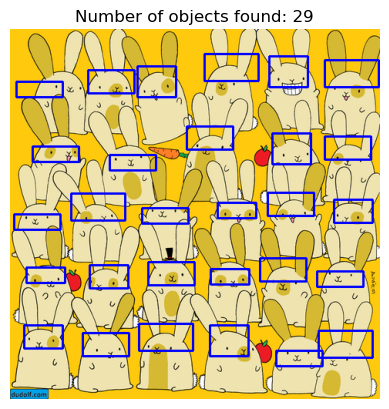

Number of rabbits: 29


In [530]:
# Count the number of rabbits
count = count_rabbit(rabbit.copy(), templates, edges)
print('Number of rabbits:', count)